In [33]:
from mne_bids import BIDSPath, write_raw_bids, get_anonymization_daysback
import random
import numpy as np
import itertools
import mne
import os
import sys
import re
import matplotlib.pyplot as plt
from bids import BIDSLayout
from util.io.iter_raw_paths import iter_raw_paths


def read_epochs(sub, desc):
    '''
    reads and concatenates epochs across runs
    '''
    layout = BIDSLayout(BIDS_ROOT, derivatives = True)
    run = lambda f: int(re.findall('run-(\w+)_', f)[0])
    fnames = layout.get(
        return_type = 'filename',
        subject = sub, 
        desc = desc
        )
    print(fnames)
    fnames.sort(key = run)
    epochs_all = [mne.read_epochs(f) for f in fnames]
    epochs = mne.concatenate_epochs(epochs_all)
    epochs = epochs.pick('eeg')
    return epochs

def plot_aux(tone_freq, epochs, sub, FIGS_DIR, aux):
    print(f"---------- Tag {tone_freq}: Audio: {aux} ----------")
    plt = epochs.plot_psd(picks = aux, fmin = 100, fmax = 300) # thought this was left
#     figname = f'{FIGS_DIR}/sub-{sub}_tone-{tone_freq}.png'
#     print(f"saving to {figname}")
#     plt.savefig(figname)

def spectrogram(x, fs, title):
    x = x.flatten()
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
    plt.title(title)
    plt.ylim(0, 300)
    plt.show()


In [16]:
RAW_DIR = '../data/raw/'

for (fname, sub, task, run) in iter_raw_paths(RAW_DIR):
    if sub != '12':
        continue
    raw = mne.io.read_raw_brainvision(RAW_DIR + fname)
    break

letty_subj_10.vhdr
letty_subj_11.vhdr
letty_subj_14.vhdr
letty_subj_15.vhdr
letty_subj_16.vhdr
letty_subj_12.vhdr
Extracting parameters from ../data/raw/letty_subj_12.vhdr...
Setting channel info structure...


In [17]:
events, event_ids = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events, picks = 'Aux1', tmin = -0.3, tmax = .3, baseline = (-0.3, 0))

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5']
Not setting metadata
4801 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Loading data for 4801 events and 3001 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_13842/4105560537.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd(fmax = 300)


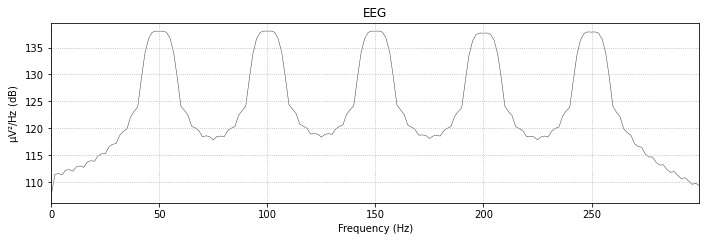

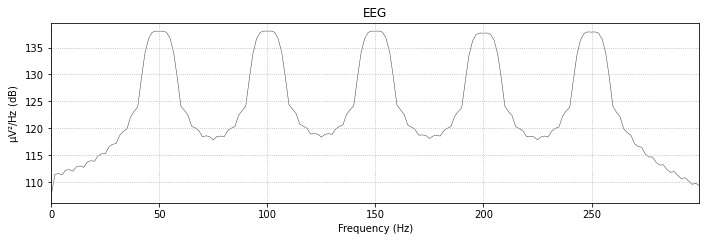

In [18]:
epochs.plot_psd(fmax = 300)

/tmp/ipykernel_13842/3330596067.py:1: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs.plot(n_epochs = 6)


Loading data for 6 events and 3001 original time points ...


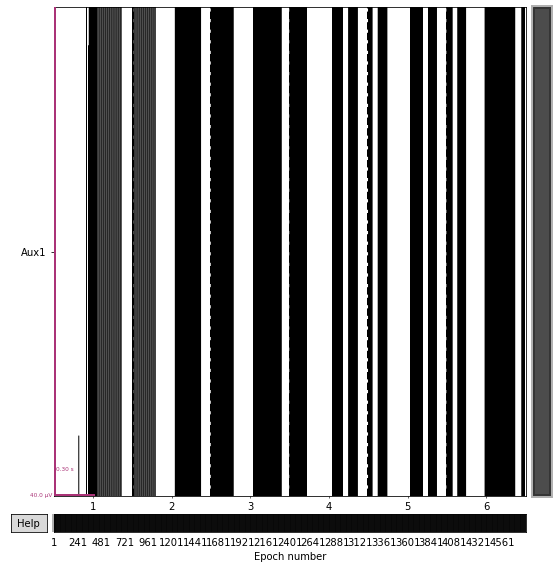

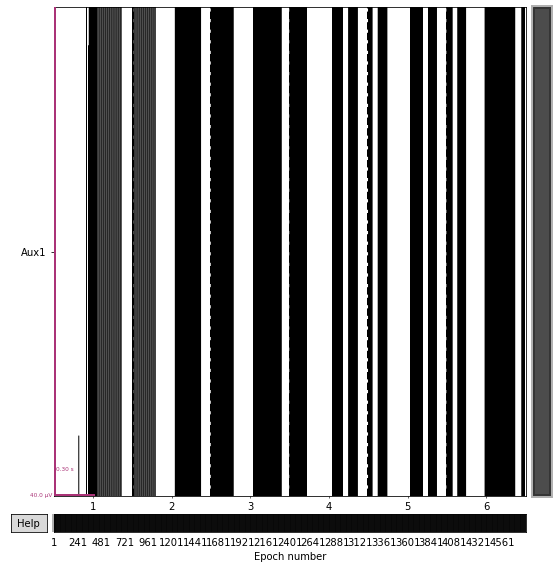

In [20]:
epochs.plot(n_epochs = 6)

In [21]:
conditions = list(epochs.event_id.keys())
evokeds = {c:epochs[c].average() for c in conditions}

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/tmp/ipykernel_13842/1433524114.py:2: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evokeds = {c:epochs[c].average() for c in conditions}


Need more than one channel to make topography for eeg. Disabling interactivity.


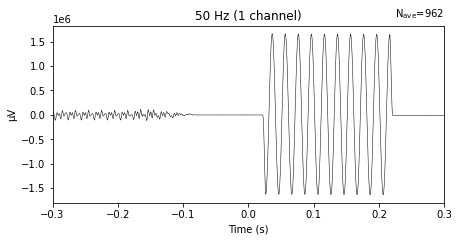

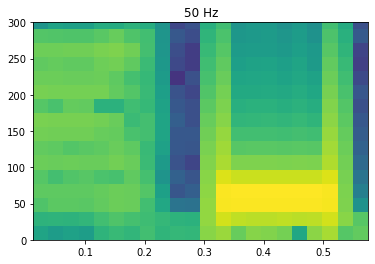

Need more than one channel to make topography for eeg. Disabling interactivity.


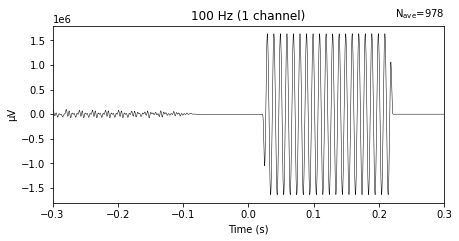

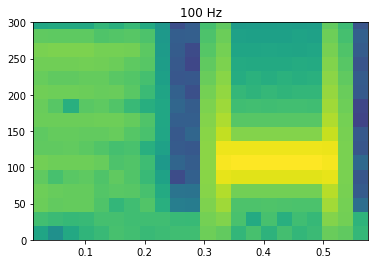

Need more than one channel to make topography for eeg. Disabling interactivity.


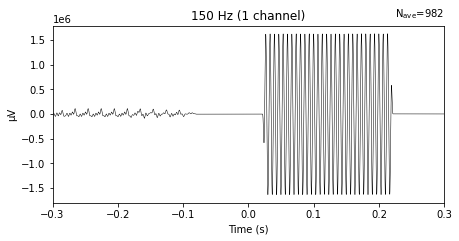

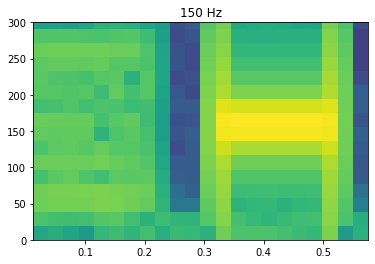

Need more than one channel to make topography for eeg. Disabling interactivity.


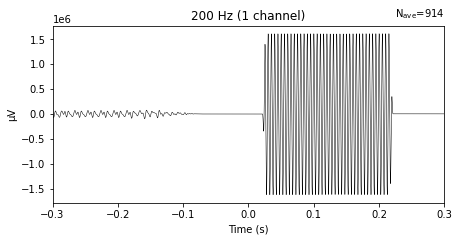

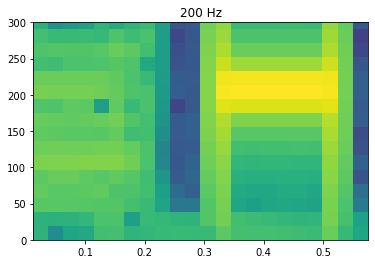

Need more than one channel to make topography for eeg. Disabling interactivity.


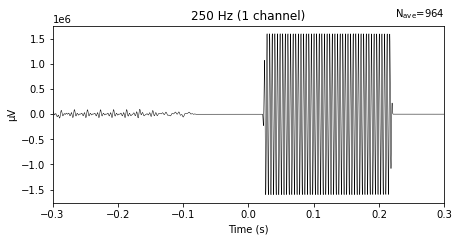

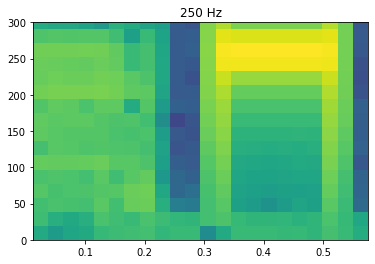

In [35]:
fs = 5000

evokeds['1'].plot(titles = '50 Hz')
spectrogram(evokeds['1'].get_data(), fs, title = '50 Hz')
evokeds['2'].plot(titles = '100 Hz')
spectrogram(evokeds['2'].get_data(), fs, title = '100 Hz')
evokeds['3'].plot(titles = '150 Hz')
spectrogram(evokeds['3'].get_data(), fs, title = '150 Hz')
evokeds['4'].plot(titles = '200 Hz')
spectrogram(evokeds['4'].get_data(), fs, title = '200 Hz')
evokeds['5'].plot(titles = '250 Hz')
spectrogram(evokeds['5'].get_data(), fs, title = '250 Hz')